In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, RepeatedKFold, learning_curve
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score, roc_auc_score

In [26]:
labels = pd.read_csv('./../../labels/labels_v2/labels_v2.csv', index_col=0)
features = pd.read_csv('./../../models/model_logistic_regression_v2/manually_selected_nofrac_features.csv', index_col=0)

print(list(features))

['BRCA1/2_mut', 'other_HRR_gene_mutation_somatic', 'cnv_DUP_len_30000_inf', 'cnv_DUP_len_30_100', 'cnv_DEL_len_100000_inf', 'cnv_DIPLOID_len_100000_inf', 'sv_n_trans', 'sv_n_del', 'sv_n_inv', 'sv_n_tadem_dup', 'sv_trans_frac', 'sv_del_frac', 'sv_inv_frac', 'sv_tadem_dup_frac', 'sv_n_all_sv', 'sv_n_svclass_stdev', 'sv_dup_30000+', 'sv_del_100000+', 'sv_microhom_deletion_mean', 'sv_microhom_inversion_mean', 'sv_microhom_tandem-duplication_mean', 'sv_microhom_translocation_mean', 'indel_n_del', 'indel_n_ins', 'ins_indel_ratio', 'del_indel_ratio', 'indel_DEL_len_1', 'indel_DEL_len_2', 'indel_DEL_len_3', 'indel_DEL_len_4', 'indel_DEL_len_inf', 'indel_INS_len_1', 'indel_INS_len_2', 'indel_INS_len_3', 'indel_INS_len_4', 'indel_INS_len_inf', 'indel_DEL_mh', 'indel_DEL_noMHstatus', 'indel_DEL_rep', 'indel_del_mh_ratio', 'Telomeric_AI', 'Interstitial_AI', 'Telomeric_LOH', 'Interstitial_LOH', 'LST_count', 'LOH_count', 'MSI', 'cnv_DEL_0_3500_sum_indel_DEL_len_inf', 'indel_INS_len_inf_sum_cnv_DUP_0

## Merge features and labels

In [27]:
table_v3 = pd.merge(features, labels, on='SAMPLE_ID', how='inner')

table_v3 = table_v3.drop(columns=['Unnamed: 0'], errors='ignore')

table_v3 = table_v3.set_index('SAMPLE_ID', inplace=False)
table_v3.to_excel('merged_features_and_labels_modelv3.0.xlsx')

# Third model run - labels v2, manually selected features

### Train/test split

In [28]:
columns_to_drop = ['labels_v2']

# features definition
X = table_v3.drop(columns_to_drop, axis=1)

# labels definition
y = table_v3['labels_v2'] # labels

original_indices = X.index

In [29]:
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, original_indices, test_size=0.3, random_state=42)

#y_train.to_excel('training_set_v3.xlsx')
#y_test.to_excel('test_set_v3.xlsx')

### Features normalization

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X.shape)
print(y.shape)

(95, 62)
(95,)


### Model training

In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)

evaluation_criteria = {
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'average_precision': 'average_precision',
    'recall': 'recall',
    'f1': 'f1',
    'balanced_accuracy': 'balanced_accuracy',
    'positive_likelihood_ratio': 'positive_likelihood_ratio'
}

scores = cross_validate(model, X, y, cv=5, scoring=evaluation_criteria)

for metric in evaluation_criteria:
    print(f"{metric}: {scores['test_' + metric]}")
    print(f"Mean {metric}: {scores['test_' + metric].mean()}")
    print(f"Std {metric}: {scores['test_' + metric].std()}\n")

roc_auc: [0.5        0.94117647 0.91176471 0.97058824 0.76470588]
Mean roc_auc: 0.8176470588235294
Std roc_auc: 0.17390288822464095

precision: [0.89473684 1.         0.9375     1.         0.94444444]
Mean precision: 0.9553362573099415
Std precision: 0.04024612430443448

average_precision: [0.92673145 0.99327182 0.98959535 0.99673203 0.96669766]
Mean average_precision: 0.9746056601283335
Std average_precision: 0.02614256577345631

recall: [1.         0.76470588 0.88235294 0.94117647 1.        ]
Mean recall: 0.9176470588235294
Std recall: 0.08803899733585746

f1: [0.94444444 0.86666667 0.90909091 0.96969697 0.97142857]
Mean f1: 0.9322655122655122
Std f1: 0.039808181002584944

balanced_accuracy: [0.5        0.88235294 0.69117647 0.97058824 0.75      ]
Mean balanced_accuracy: 0.7588235294117647
Std balanced_accuracy: 0.16232523207701913

positive_likelihood_ratio: [1.                nan 1.76470588        nan 2.        ]
Mean positive_likelihood_ratio: nan
Std positive_likelihood_ratio: na

/home/klaudiautm/PycharmProjects/final_project/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/klaudiautm/PycharmProjects/final_project/venv/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:213: UserWarning: negative_likelihood_ratio ill-defined and being set to nan 
  return func(*args, **kwargs)
/home/klaudiautm/PycharmProjects/final_project/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



### Model testing

In [32]:
y_pred = model.predict(X_test)

y_pred_list = pd.DataFrame(y_pred, columns=['Predicted'], index=idx_test)

### Model evaluation

In [33]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"AUC: {roc_auc}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(cr)

Accuracy: 0.7931034482758621
AUC: 0.565
Confusion Matrix:
[[ 1  3]
 [ 3 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.88      0.88      0.88        25

    accuracy                           0.79        29
   macro avg       0.56      0.56      0.56        29
weighted avg       0.79      0.79      0.79        29



<Axes: >

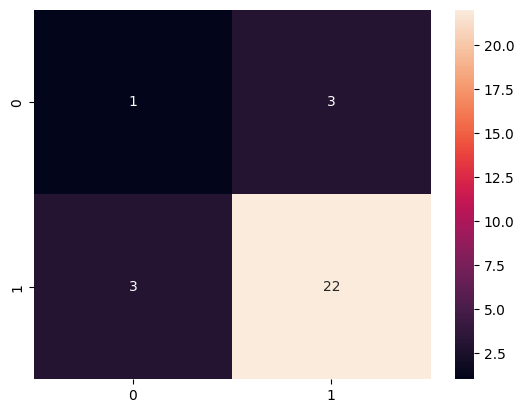

In [34]:
import seaborn as sns
sns.heatmap(cm, annot=True)

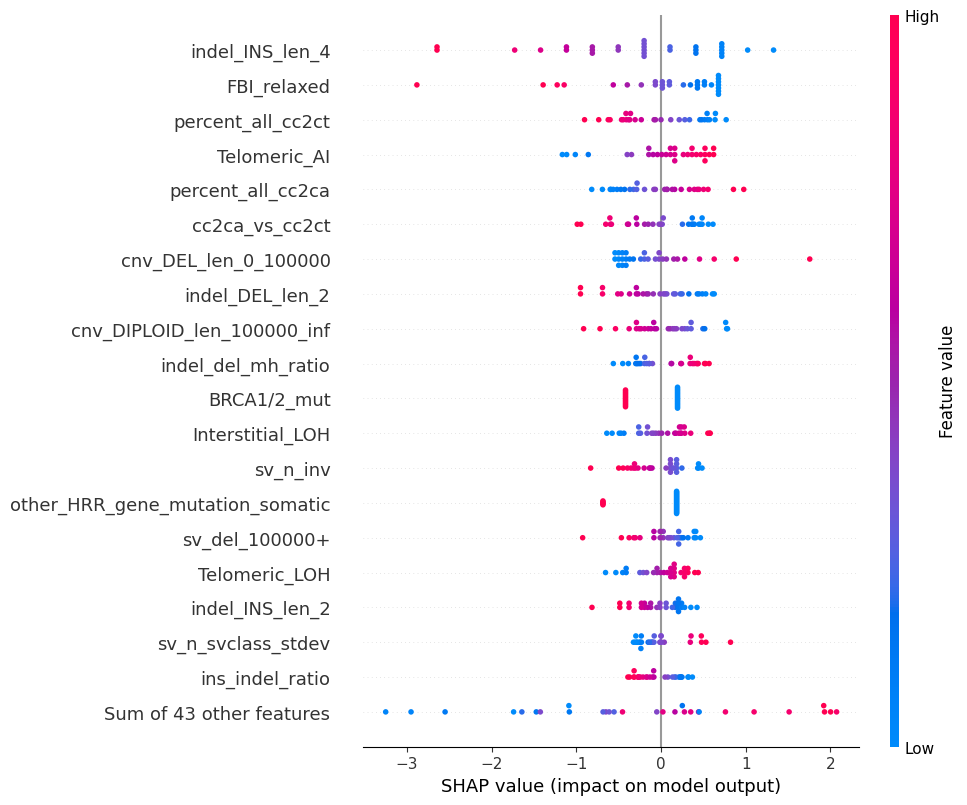

In [35]:
import shap

original_feature_names = ['BRCA1/2_mut', 'other_HRR_gene_mutation_somatic', 'cnv_DUP_len_30000_inf', 'cnv_DUP_len_30_100', 'cnv_DEL_len_100000_inf', 'cnv_DIPLOID_len_100000_inf', 'sv_n_trans', 'sv_n_del', 'sv_n_inv', 'sv_n_tadem_dup', 'sv_trans_frac', 'sv_del_frac', 'sv_inv_frac', 'sv_tadem_dup_frac', 'sv_n_all_sv', 'sv_n_svclass_stdev', 'sv_dup_30000+', 'sv_del_100000+', 'sv_microhom_deletion_mean', 'sv_microhom_inversion_mean', 'sv_microhom_tandem-duplication_mean', 'sv_microhom_translocation_mean', 'indel_n_del', 'indel_n_ins', 'ins_indel_ratio', 'del_indel_ratio', 'indel_DEL_len_1', 'indel_DEL_len_2', 'indel_DEL_len_3', 'indel_DEL_len_4', 'indel_DEL_len_inf', 'indel_INS_len_1', 'indel_INS_len_2', 'indel_INS_len_3', 'indel_INS_len_4', 'indel_INS_len_inf', 'indel_DEL_mh', 'indel_DEL_noMHstatus', 'indel_DEL_rep', 'indel_del_mh_ratio', 'Telomeric_AI', 'Interstitial_AI', 'Telomeric_LOH', 'Interstitial_LOH', 'LST_count', 'LOH_count', 'MSI', 'cnv_DEL_0_3500_sum_indel_DEL_len_inf', 'indel_INS_len_inf_sum_cnv_DUP_0_30000', 'indel_INS_len_inf_sum_cnv_DUP_0_1000', 'FBI_relaxed', 'percent_all_cc2ca', 'percent_all_cc2ct', 'cc2ca_vs_cc2ct', 'SBS31', 'ccne1_amp', 'resistant_ccne1_over_6', 'cnv_DUP_len_0_30000', 'cnv_DEL_len_0_100000', 'cnv_DIPLOID_len_0_100000', 'sv_dup_0_30000', 'sv_del_0_100000']
X_train_features = pd.DataFrame(X_train, columns=original_feature_names)
X_test_features = pd.DataFrame(X_test, columns=original_feature_names)

explainer = shap.Explainer(model, X_train_features)
shap_values = explainer(X_test_features)
shap.plots.beeswarm(shap_values, max_display=20)

In [36]:
predicted_vs_original_labels = pd.merge(labels, y_pred_list, on='SAMPLE_ID', how='inner')
predicted_vs_original_labels.to_excel('predicted_vs_original_labels_modelv3.0.xlsx')